# NLTK

Here are a few notes from the NLTK book chapter 1, focusing on what you need to know for the first homework and a few other helpful things.

NLTK, the Natural Language Toolkit, was developed in 2001 at the University of Pennsylvania. Since then it has been under continual development, incorporating features from dozens of contributors.

We will be using NLTK 3 which is updated to work with Python 3. Instructions for installing NLTK can be found [here](http://www.nltk.org/). 

### Downloading NLTK book files

The following shows how to download everything used in the NLTK book. This make take some time the first time you do this, as Jupyter configures your system, but should work quickly thereafter. If you enter these commands at terminal in Python, you should have no problem.

When you enter the following 2 lines, a box will pop up giving you options for things to download. Choose "Everything used in the NLTK Book" and hit download.

That is all we are downloading for now, although we can revisit this command at any time to download packages and corpora as needed.

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Now that we have installed the data associated with the book, we can explore some of the texts.

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


If we enter the name of the text we can see its title.

In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

### NLTK functions: concordance, similarity, and more

Next we just take a tour of some cool built-in functionality of NLTK.
It is good to familiarize ourselves with what NLTK can do for us so we don't reinvent the wheel. NLTK is open source so you can see the code, which also links to the documentation. 

First we look at corcordance. You can see the code [here](http://www.nltk.org/_modules/nltk/text.html). The concordance function lists every occurrence of a word with the surrounding context. 

In [5]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Words that are similar have similar context. We can search for similar words in a text, and display the common contexts. Note that 'similar' in this context does not mean synonymous. It simply means that the words occur in similar contexts. The word 'loving' is nearly opposite in meaning to 'monstrous' but in this text it had similar context.

Context is text-dependent. We see in text2 that the word has different similarities because Jane Austen uses the word as an intensifier like the word 'very'. We can examine in text2 the common context of 'monstrous' and 'very' by enclosing these two in a list [] and sending the list as an argument to the common_contexts function.

In [8]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [9]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [13]:
text2.common_contexts(['monstrous', 'very'])

a_pretty am_glad a_lucky is_pretty be_glad


### Dispersion plot

A dispersion plot visualizes word occurrences in a document. Each line represents the entire document with the ticks noting an occurence of the word.

If you get an error, it may be that you need to install [matplotlib](https://matplotlib.org/users/installing.html).

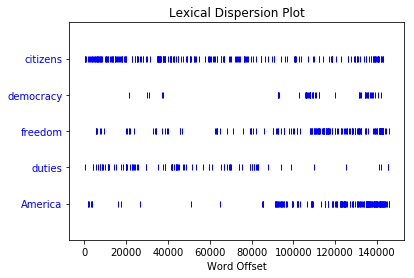

In [24]:
text4.dispersion_plot(['citizens', 'democracy', 'freedom', 'duties', 'America'])

### generate()

This function generated text similar to what it found in the source document. The function has been deprecated but I'm hoping it comes back with future releases.

In [28]:
text1.generate()

AttributeError: 'Text' object has no attribute 'generate'

### vocabulary

As we have seen the vocabulary of different text varies significantly. Next we explore ways to learn more about the text vocabulary.

The len() function will count the number of tokens, where 'tokens' is roughly equivalent to words, punctuation, numbers, basically any sequence of characters that is a unit. So, "3 Blind Mice." would consist of 4 tokens.

In [33]:
tokens = nltk.word_tokenize("3 Blind Mice.")
print(tokens)
len(tokens)

['3', 'Blind', 'Mice', '.']


4

Let's learn more about text3 with NLTK functions. The len() function gives you the count of all tokens. If we want a count of unique tokens we need to create a set and then count them.

If we had eliminated punctional, the set of unique words could be called the word types. 

In [41]:
len(text3)
unique = sorted(set(text3))
unique[:25]  # show the first few


['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad']

In [42]:
len(unique)

2789

### counting words

We can count the number of times a word occurs in a text and then compute what percentage that is of the total tokens.

In [43]:
text3.count('smote')

5

In [44]:
100 * text3.count('smote') / len(text3)

0.01116968992940756

### lexical diversity

Let's create a couple of functions that make these calculations for us so it will be easier to try them out on other words and texts.

Note that if you are typing these at the console, Python will expect you to follow the indentation rules.

In [45]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total


In [46]:
lexical_diversity(text3)

0.06230453042623537

In [47]:
lexical_diversity(text5)

0.13477005109975562

In [48]:
percentage(text4.count('a'), len(text4))

1.4643016433938312

### frequency distributions

Gathering statistical data on text can be useful in many situations. First we look at frequency distributions, which give us the count of tokens in text. NLTK has a function to compute frequency distributions, find the most common words, and much more.

In [50]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [51]:
fdist1.most_common(25)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280)]

In [52]:
fdist1['whale']

906

Not surprisingly the most common words in this text are pretty much the same common words in all text. These 'glue' words hold a sentence together but don't provide any content. These are called *stop words* in NLP and we will learn ways to remove them from text later in the course. 

The plot below shows a cumulative frequency for the top 50 words. The top 50 words account for almost half the book. 

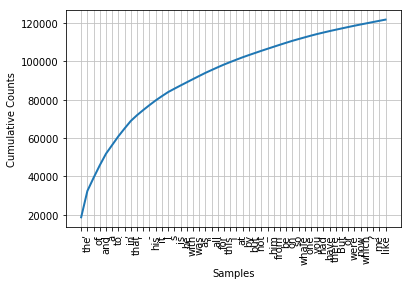

In [54]:
fdist1.plot(50, cumulative=True)

The term *hapax legomenon* is a term from the Greek which means a word that occurs only once within a text.  

Zipf's law states that given some text corpus, the frequency of any word is inversely proportional to its rank in the frequency table. That is, the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. 

In [56]:
hapaxes = fdist1.hapaxes()
hapaxes[:25]   # display a few

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK']

The following code looks for long words. It first createa a vocabulary, V, of unique terms, then uses a list comprehension to select only words longer than 15 characters. Finally it sorts them.

In [57]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

Now let's modify our approach to find frequently occuring long words. Later in the course we will learn more reliable methods to find *important* words in a text.

In [62]:
fdist1 = FreqDist(text1)
sorted(w for w in set(text1) if len(w) > 11 and fdist1[w] > 7)

['Mediterranean',
 'Nantucketers',
 'Nevertheless',
 'circumstance',
 'circumstances',
 'comparatively',
 'confidential',
 'considerable',
 'considerably',
 'consideration',
 'consternation',
 'contrivances',
 'indispensable',
 'involuntarily',
 'mechanically',
 'nevertheless',
 'occasionally',
 'particularly',
 'peculiarities',
 'perpendicular',
 'perpendicularly',
 'simultaneously',
 'sufficiently',
 'superstitious',
 'unaccountable']

### collocating bigrams

I bigram is just two words that occur next to each other. A collocation is a bigram that occurs more frequently than random chance would suggest, implying that these two words together carry more meaning that the individual words by themselves. 

In [63]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [64]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


These nifty functions work on nltk Text objects (see below). What if we want to use them on our own function we have to convert our text to tokens and then to a Text object. An example is given below.

In [18]:
type(text1)  # what kind of object is text1?

nltk.text.Text

In [19]:
with open('const.txt') as f:
    raw = f.read()
    tokens = nltk.word_tokenize(raw)
    text_const = nltk.Text(tokens)

In [20]:
text_const.concordance('people')

Displaying 9 of 9 matches:
                                    People of the United States , in Order to 
ers chosen every second Year by the People of the several States , and the Ele
 of the press ; or the right of the people peaceably to assemble , and to peti
 of a free State , the right of the people to keep and bear Arms , shall not b
 law . Amendment 4 The right of the people to be secure in their persons , hou
or disparage others retained by the people . Amendment 10 The powers not deleg
the States respectively , or to the people . Amendment 11 The Judicial power o
rs from each State , elected by the people thereof , for six years ; and each 
ke temporary appointments until the people fill the vacancies by election as t


#### Practice 1

* Find and display the words in text6 that contain a z using a list comprehension
* Remove duplicates by making a set from the list
* Print the unique words

In [4]:
# your code here

#### Practice 2

1. Produce a dispersion plot of the 4 main characters of *Sense and Sensibility*: Elinor, Marianne, Edward, and Willoughby. Compare the males and females. Can you identify couples?

In [5]:
# your code here

#### Practice 3

* Use the .index() method to find the index of 'sunset' in text9
* Through trial and error find the slice that gives you the full sentence
* Make the first token in Sentence case instead of all caps
* Clean up the sentence by getting rid of the space in front of punctuation (use the .replace(old,  new) method
* Display the sentence

In [6]:
# your code here

#### Practice 4

Find all the 9-letter words in text 5, the Chat Corpus. With the help of FreqDist, show these words in decreasing order of frequency by:

* creating a dictionary of the words as key and frequency as value
* sorting the dictionary and displaying the key, values in decreasing order

In [7]:
# your code here
    